- Seq2Seq : 입력과 출력의 길이가 다른 데이터에서 사용
- 어텐션 : 인코더의 모든 시점에서의 은닉상태를 현재의 입력에 반영
- 토큰 : 문자를  숫자로 나타내는 방법 <SOS>, <EOS> 시작과 끝을 나타내는 태그가 존재
- GRU : 셀 상태를 없애고 은닉생태만 이용해서 현재의 정보를 추출

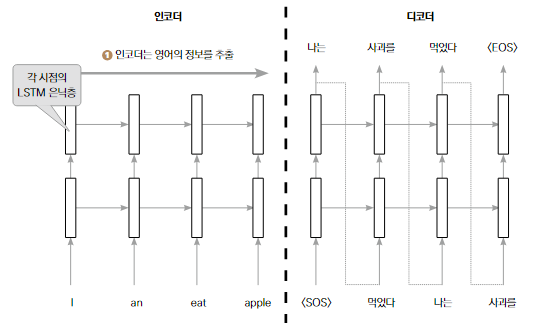

In [ ]:
# 장점 : 이론상 RNN과 LSTM보다 성능이 좋다
# 단점 : 알고리즘이 복잡해서 구현이 어려움, 모든 시점을 고려하기 때문에. 계산량이 많음


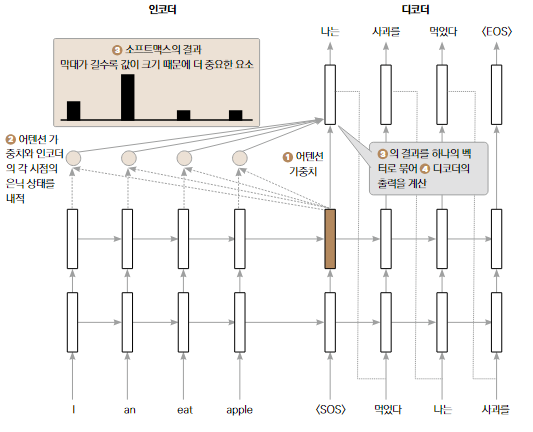

GRU(gated recurrent unit)
  - LSTM을 간략화 시킨 모델,  셀 상태와 은닉생태를 통합한 모델

In [2]:
# 데이터는 http://www.manythings.org/anki/
# kor-eng.zip 다운로드

In [3]:
!unzip '/content/kor-eng.zip'

Archive:  /content/kor-eng.zip
  inflating: _about.txt              
  inflating: kor.txt                 


In [27]:
import string
li = []
with open('/content/kor.txt','r') as kor_file:
  lines = kor_file.read().split('\n')
  for line in lines:
    # 특수문자를 지우고 모든 문자를 소문자로 변경
    txt = "".join(v for v in line if v not in string.punctuation).lower()
    li.append( '\t'.join(txt.split('\t')[:2]) )

In [28]:
li[:5]

['go\t가', 'hi\t안녕', 'run\t뛰어', 'run\t뛰어', 'who\t누구']

In [31]:
# 학습용 데이터 만들기
import numpy as np
import torch
from torch.utils.data.dataset import Dataset

In [32]:
def get_BOW(corpus):
  BOW = {'<SOS>':0,"<EOS>":1}
  for line in corpus:
    for word in line.split():
      if word not in BOW.keys():
        BOW[word] = len(BOW.keys())
  return BOW

In [34]:
get_BOW(["Tom has low blood pressure"])

{'<SOS>': 0,
 '<EOS>': 1,
 'Tom': 2,
 'has': 3,
 'low': 4,
 'blood': 5,
 'pressure': 6}